# Libraries

In [173]:
import pandas
import matplotlib.pyplot as plt
pandas.set_option('max_rows', 20)
pandas.set_option('max_columns',150)
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as statsmodels # useful stats package with regression functions
import seaborn as sns # very nice plotting package

# style settings
sns.set(color_codes=True, font_scale = 1.2)
sns.set_style("whitegrid")

In [252]:
# Code edited from CS51 2.1 class cocalc, extra explanations added where needed
def mult_regression(column_x, column_y, _data, x_label, y_label, title, filename):
    global regressionmodel
    ''' this function uses built in library functions to construct a linear 
    regression model with potentially multiple predictor variables. It outputs 
    two plots to assess the validity of the model.'''
    if len(column_x)==1:
        plt.figure()
        # This calculates a regression plot based on the equations we learned in class,
        # and probably some things we didn't learn on exactly how to easily calculate
        # this in python. Still explanation of this is outside of the scope of this paper
        plot = sns.regplot(x=column_x[0], y=column_y, data=_data, marker="+",fit_reg=True,color='orange')
        if (len(title) > 0):
            plot.set_title(title)
        plot.set_xlabel(x_label)
        plot.set_ylabel(y_label)
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    data = _data
    X = data[column_x]
    X = statsmodels.add_constant(X)
    Y = data[column_y]
    regressionmodel = statsmodels.OLS(Y,X).fit() 

    plt.figure()
    residualplot = sns.residplot(x=regressionmodel.predict(), y=regressionmodel.resid, color='orange', label='Regression')
    residualplot.set_alpha(0.5)
    plt.show()

    # QQ plot:
    qqplot = statsmodels.qqplot(regressionmodel.resid,fit=True,line='45')
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals",fontweight='bold',fontsize=14)

# Data Importing & Preprocessing

In [412]:
fileName = "Processed [Fall 2019] SSS Final Combined Dataset.xlsx"
SSSFinalCombinedData = pandas.read_excel(fileName, sheet_name=1)
SSSFinalCombinedData.head(1)

,ID,AH50 Only - MC Mean,CS50 Only - FA Mean,Overall CS,Overall EA,Overall FA,Overall MC,Q22_Coding,Q26_Coding,Q15_Coding,Q25_Coding,Q17_Coding,Q19_Coding,Q21_Coding,Q53_1_Coding,Q53_2_Coding,Q55_Coding,Q22.1_Coding,Q27_Coding,Q33_Coding,Q34_Coding,Q35_Coding,Q22_Writing,Q26_Writing,Q15_Writing,Q25_Writing,Q17_Writing,Q19_Writing,Q21_Writing,Q53_1_Writing,Q53_2_Writing,Q55_Writing,Q22.1_Writing,Q27_Writing,Q33_Writing,Q34_Writing,Q35_Writing,SPS_Coding_2,SPS_Coding_3,SPS_Coding_4,SPS_Coding_5,SPS_Coding_6,SPS_Coding_7,SPS_Coding_8,SPS_Coding_9,SPS_Coding_10,SPS_Coding_11,SPS_Coding_12,SPS_Coding_13,SPS_Coding_14,SPS_Writing_2,SPS_Writing_3,SPS_Writing_4,SPS_Writing_5,SPS_Writing_6,SPS_Writing_7,SPS_Writing_8,SPS_Writing_9,SPS_Writing_10,SPS_Writing_11,SPS_Writing_12,SPS_Writing_13,SPS_Writing_14,Pre_Math_OverallPoints,Pre_Writing_OverallPoints,Pre_Programming_OverallPoints,Post_Programming_OverallPoints,Post_Math_OverallPoints,Post_Writing_OverallPoints,average-faulty,average,week 14,absences,Labs completed
0,ed810db6,3.067493,2.743173,3.062499,2.780515,2.685229,2.917084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Only some of it,3.0,NaN,I passed the preliminary assessment and didn't...,I did not sign up,1.0,-,I went through only part of the assignments/se...,4.0,NaN,"Yes, not frequently (less than once a week)",3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,9.0,Written Statement,No Submission,16,Passed before,0.0,0.0,0.0,1.0,3.0


In [413]:
# only pick the columns we need & Rename for easier coding
SSSFinalCombinedData = SSSFinalCombinedData[['Overall CS','Overall EA','Overall FA','Overall MC', 'Q22_Coding', 'Q22_Writing', 'average', 'week 14', 'absences', 'Labs completed']]
SSSFinalCombinedData = SSSFinalCombinedData.rename(columns={"Overall CS": "CS", "Overall EA": "EA", "Overall FA": "FA", "Overall MC": "MC",\
                  'Q22_Coding': 'Coding', 'Q22_Writing':'Writing'})

SSSFinalCombinedData.head(200)

,CS,EA,FA,MC,Coding,Writing,average,week 14,absences,Labs completed
0,3.062499,2.780515,2.685229,2.917084,NaN,NaN,0.000,0.0,1.0,3.0
1,2.554314,2.140117,2.093984,2.423970,NaN,NaN,0.016,0.0,2.0,0.0
2,3.017345,2.478609,2.870685,2.931172,NaN,NaN,0.026,0.0,4.0,1.0
3,2.904637,2.314054,2.218194,2.503142,Coding (Thursdays),NaN,0.032,2.0,3.0,0.0
4,2.566586,2.987773,2.598805,3.152574,Coding (Thursdays),NaN,0.060,1.0,2.0,1.0
5,3.042835,3.101165,2.959410,3.214962,Coding (Thursdays),NaN,0.099,7.0,3.0,3.0
6,2.715323,2.659998,2.987707,2.500443,Coding (Thursdays),NaN,0.111,0.0,1.0,1.0
7,3.153061,2.797529,2.853057,2.780190,Coding (Thursdays),Writing (Tuesdays),0.123,5.0,4.0,3.0
8,2.182446,2.380845,2.531868,2.708478,Coding (Thursdays),Writing (Tuesdays),0.130,8.0,4.0,1.0
9,2.855822,2.872457,3.175789,3.132707,Coding (Thursdays),Writing (Tuesdays),0.153,4.0,2.0,2.0


In [414]:
# Swap the Q22 data with 0 = not attending SSS and 1 = attending SSS for correlation purposes
coding = SSSFinalCombinedData['average'].astype(str) == "nan"
writing = SSSFinalCombinedData['Writing'].astype(str) == "nan"
for i in range(len(SSSFinalCombinedData['FA'])):
    if coding[i]:
        SSSFinalCombinedData.loc[i,'Coding'] = 0
    else:
        SSSFinalCombinedData.loc[i,'Coding'] = 1
    if writing[i]:
        SSSFinalCombinedData.loc[i,'Writing'] = 0
    else:
        SSSFinalCombinedData.loc[i,'Writing'] = 1
        
SSSFinalCombinedData.head(200)

,CS,EA,FA,MC,Coding,Writing,average,week 14,absences,Labs completed
0,3.062499,2.780515,2.685229,2.917084,1,0,0.000,0.0,1.0,3.0
1,2.554314,2.140117,2.093984,2.423970,1,0,0.016,0.0,2.0,0.0
2,3.017345,2.478609,2.870685,2.931172,1,0,0.026,0.0,4.0,1.0
3,2.904637,2.314054,2.218194,2.503142,1,0,0.032,2.0,3.0,0.0
4,2.566586,2.987773,2.598805,3.152574,1,0,0.060,1.0,2.0,1.0
5,3.042835,3.101165,2.959410,3.214962,1,0,0.099,7.0,3.0,3.0
6,2.715323,2.659998,2.987707,2.500443,1,0,0.111,0.0,1.0,1.0
7,3.153061,2.797529,2.853057,2.780190,1,1,0.123,5.0,4.0,3.0
8,2.182446,2.380845,2.531868,2.708478,1,1,0.130,8.0,4.0,1.0
9,2.855822,2.872457,3.175789,3.132707,1,1,0.153,4.0,2.0,2.0


# Histograms & Basic info


Count

CS                160
EA                160
FA                160
MC                160
Coding             82
Writing            18
average            99
week 14            94
absences           99
Labs completed    103
dtype: int64

Mean

CS                3.032371
EA                3.076449
FA                3.087280
MC                3.049046
average           0.354747
week 14           3.531915
absences          1.424242
Labs completed    2.601942
dtype: float64

SD

CS                0.284627
EA                0.273223
FA                0.308280
MC                0.290648
average           0.194329
week 14           3.487927
absences          1.116581
Labs completed    1.906335
dtype: float64

Median

CS                3.035341
EA                3.087871
FA                3.108663
MC                3.040975
average           0.323000
week 14           3.000000
absences          1.000000
Labs completed    2.000000
dtype: float64

Max

CS                 3.928072
EA         

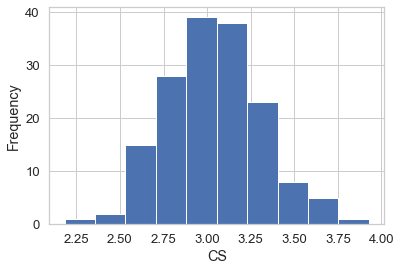

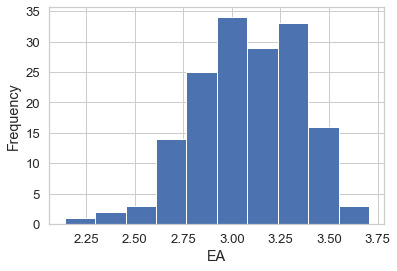

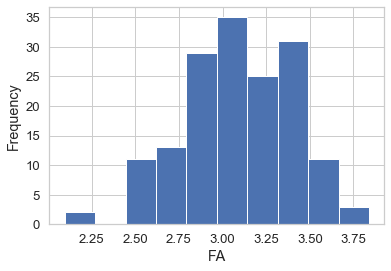

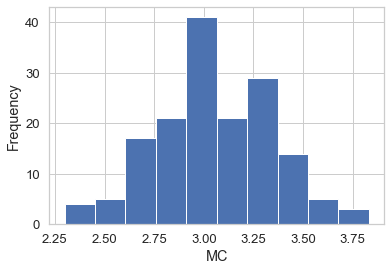

TypeError: '<=' not supported between instances of 'float' and 'str'

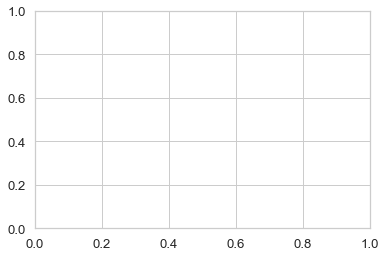

In [256]:
# show a histogram for each of the different columns
def printDescriptiveStats (dataframe): # prints the descriptive basic stats
    print('\nCount\n')
    print(dataframe.count()) 
    print('\nMean\n')
    print(dataframe.mean()) 
    print('\nSD\n')
    print(dataframe.std()) # note that Bessel's correction of n-1 is used by default
    print('\nMedian\n')
    print(dataframe.median())
    print('\nMax\n')
    print(dataframe.max())
    print('\nMin\n')
    print(dataframe.min())
    
    
printDescriptiveStats(SSSFinalCombinedData) 

for dataColumn in list(SSSFinalCombinedData):
    #plt.hist(data[dataColumn], bins=10, range=[2,4])
    plt.hist(SSSFinalCombinedData[dataColumn])
    plt.xlabel(dataColumn)
    plt.ylabel('Frequency')
    #plt.ylim(top=50)
    plt.show()

# Regression
For taking the SSS vs FA & MC Grades

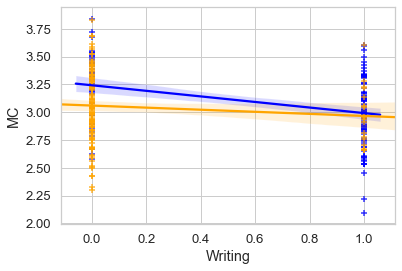

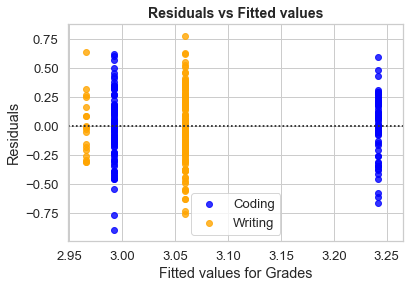

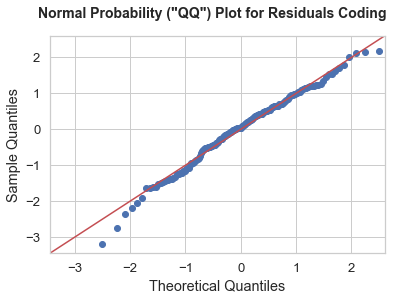

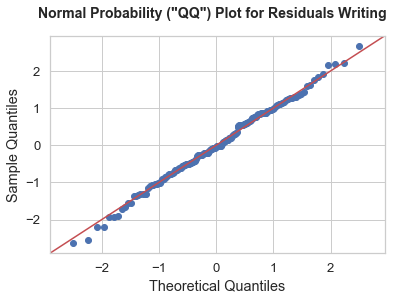

In [277]:
# Code edited from CS51 2.1 class cocalc, extra explanations added where needed
def regression_Double(column_x1, column_y1, column_x2, column_y2, data):
    global regressionmodel1, regressionmodel2
    ''' this function uses built in library functions to construct a linear 
    regression model with potentially multiple predictor variables. It outputs 
    two plots to assess the validity of the model.'''
    plt.figure()
    # This calculates a regression plot based on the equations we learned in class,
    # and probably some things we didn't learn on exactly how to easily calculate
    # this in python. Still explanation of this is outside of the scope of this paper
    sns.regplot(x=column_x1, y=column_y1, data=data, marker="+",fit_reg=True,color='blue')
    sns.regplot(x=column_x2, y=column_y2, data=data, marker="+",fit_reg=True,color='orange')    
    
    # We do the same thing above for two genders independently just to drawn the graph 9
    X1 = data[column_x1]
    X1 = statsmodels.add_constant(X1)
    Y1 = data[column_y1]
    regressionmodel1 = statsmodels.OLS(Y1,X1).fit() 
    X2 = data[column_x2]
    X2 = statsmodels.add_constant(X2)
    Y2 = data[column_y2]
    regressionmodel2 = statsmodels.OLS(Y2,X2).fit()

    
    # this section plots male and female graphs on top of each other for graph 9
    plt.figure()
    residualplot1 = sns.residplot(x=regressionmodel1.predict(), y=regressionmodel1.resid, color='blue', label='Coding')
    residualplot2 = sns.residplot(x=regressionmodel2.predict(), y=regressionmodel2.resid, color='orange',label='Writing')
    residualplot2.set(xlabel='Fitted values for Grades', ylabel='Residuals')
    residualplot2.set_title('Residuals vs Fitted values',fontweight='bold',fontsize=14)
    residualplot2.legend()
    residualplot2.set_alpha(0.5)

    # QQ plot:
    qqplot = statsmodels.qqplot(regressionmodel1.resid,fit=True,line='45')
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals Coding",fontweight='bold',fontsize=14)
    qqplot = statsmodels.qqplot(regressionmodel2.resid,fit=True,line='45')
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals Writing",fontweight='bold',fontsize=14)
    
regression_Double('Coding', 'FA', 'Writing', 'MC', SSSFinalCombinedData)

In [278]:
regressionmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     FA   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     29.26
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           2.30e-07
Time:                        16:45:25   Log-Likelihood:                -24.657
No. Observations:                 160   AIC:                             53.31
Df Residuals:                     158   BIC:                             59.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2420      0.036     89.138      0.000       3.170       3.314
Coding        -0.2501      0.046     -5.409      0.000      -0.341      -0.159
==============================================================================
Omnibus:                        3.866   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                3.596
Skew:                          -0.366   Prob(JB):                        0.166
Kurtosis:                       3.069   Cond. No.                         3.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [279]:
regressionmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     MC   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.658
Date:                Sat, 28 Mar 2020   Prob (F-statistic):              0.200
Time:                        16:45:26   Log-Likelihood:                -27.991
No. Observations:                 160   AIC:                             59.98
Df Residuals:                     158   BIC:                             66.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0596      0.024    125.699      0.000       3.011       3.108
Writing       -0.0934      0.073     -1.288      0.200      -0.237       0.050
==============================================================================
Omnibus:                        0.101   Durbin-Watson:                   1.459
Prob(Omnibus):                  0.951   Jarque-Bera (JB):                0.166
Skew:                          -0.059   Prob(JB):                        0.920
Kurtosis:                       2.894   Cond. No.                         3.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Histogram overlays

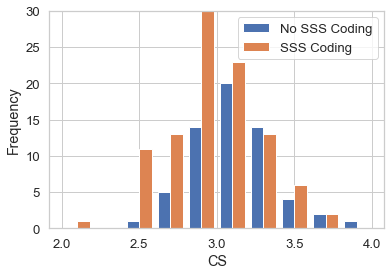

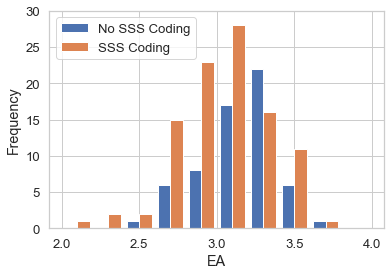

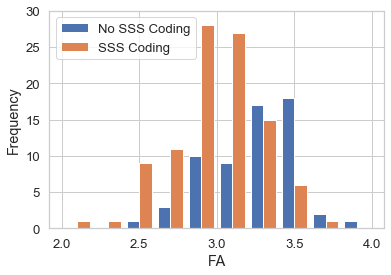

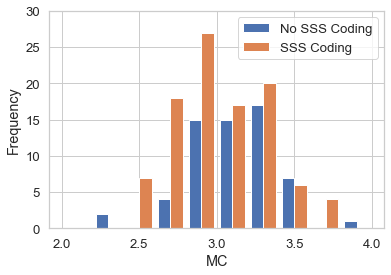

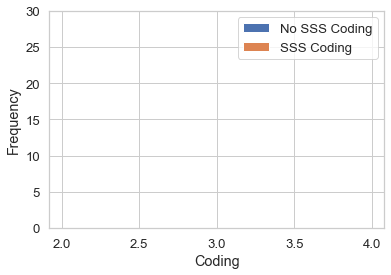

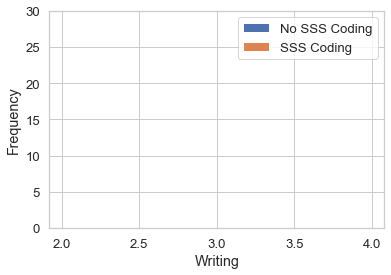

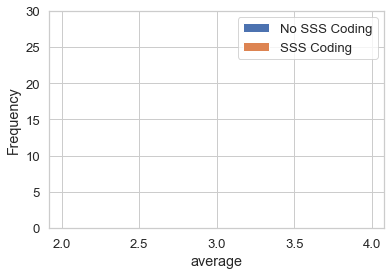

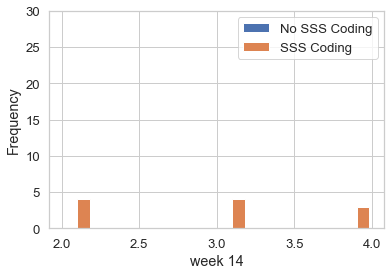

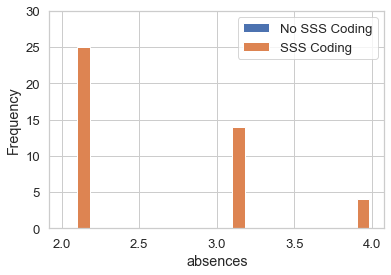

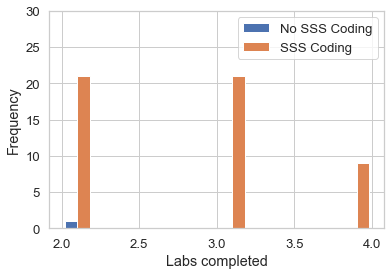

In [280]:
data = SSSFinalCombinedData
for dataColumn in list(data):
    plt.hist([(data[(data['Coding']==0)])[dataColumn],(data[(data['Coding']==1)])[dataColumn]], bins=10, range=[2,4], label=['No SSS Coding','SSS Coding'])
    plt.legend()
    plt.xlabel(dataColumn)
    plt.ylabel('Frequency')
    plt.ylim(top=30)
    plt.show()


# Artem's code for processing the excel

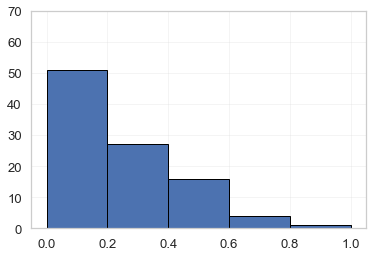

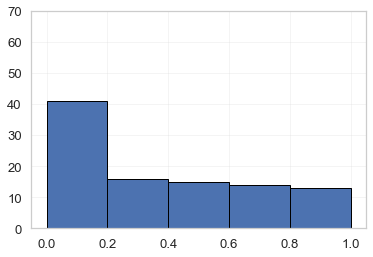

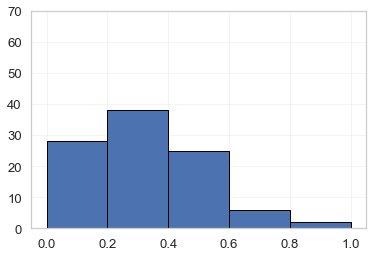

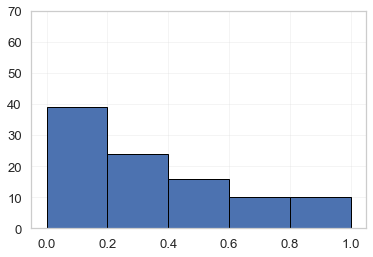

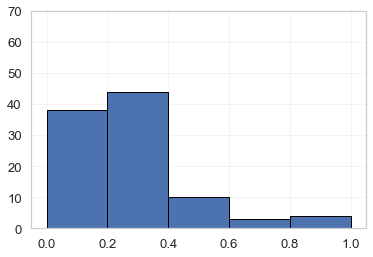

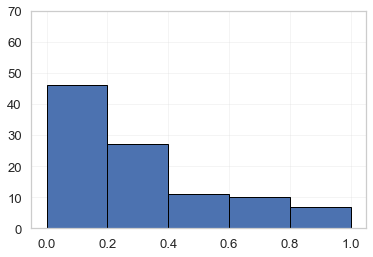

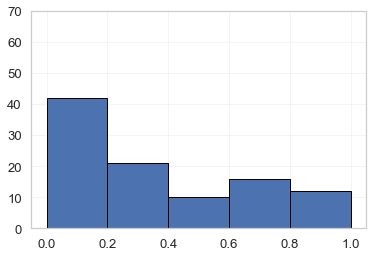

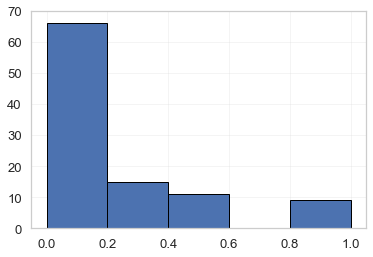

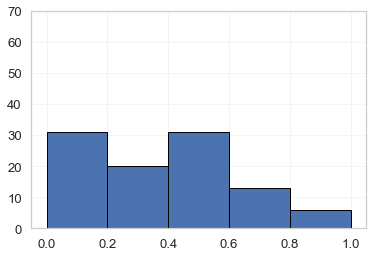

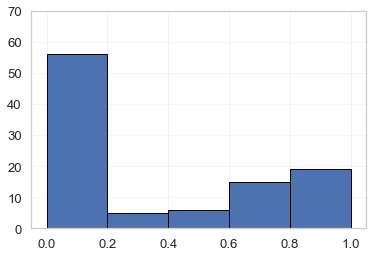

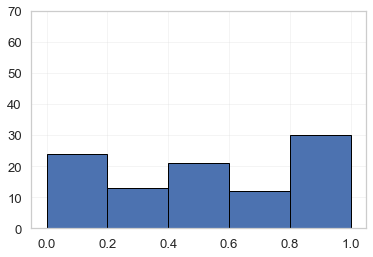

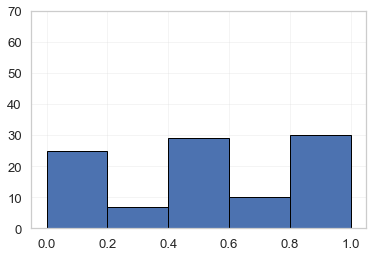

Done!


In [182]:
totals = [40, 28, 22, 23, 24, 23, 26, 22, 17, 6, 15, 10]
for i in range(2, 14):
    week_scores = []
    data = pandas.read_excel('Fall2019_Coding_SSS_Attendance_Tracker.xlsx', sheet_name=i)
    data = data.fillna(0)
    week_scores.append(data.loc[:, "Total Score "])
    for x in range(len(week_scores)):
        week_scores[x] = week_scores[x]/totals[i-2]
        
    plt.hist(week_scores, ec='black', bins=5, range=[0,1])
    plt.ylim(top=70)
    plt.grid(alpha=.2)
    plt.savefig('Coding score Histogram week '+str(i), dpi=300, bbox_inches='tight')
    plt.show()
    
print('Done!')

# More Regression
How assignment weights that week, whether there is an assignment same day or not, and 'notebook difficulty' affects how many students will be absent that week

In [183]:
contextualData = pandas.read_csv("Assignment Dates - CSV Export.csv")
contextualData = contextualData.dropna()
contextualData.head(20)

,Weight,SameDay,Difficulty,Absence
0,0,0,55.714286,6.0
1,0,0,69.444444,5.0
2,6,1,71.000000,11.0
3,8,0,74.285714,10.0
4,9,1,63.571429,36.0
5,0,0,80.000000,15.0
6,0,0,54.166667,5.0
7,8,0,69.285714,9.0
8,8,1,90.000000,15.0
9,14,0,80.000000,13.0


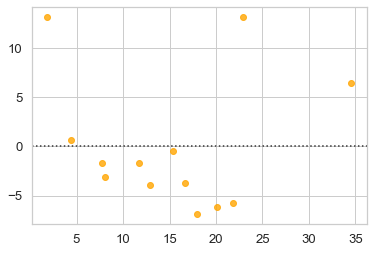

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Absence   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     5.071
Date:                Sat, 28 Mar 2020   Prob (F-statistic):             0.0251
Time:                        14:09:11   Log-Likelihood:                -42.794
No. Observations:                  13   AIC:                             93.59
Df Residuals:                       9   BIC:                             95.85
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.2044     14.711      1.441      0.183     -12.075      54.484
Weight         1.0608      0.335      3.170      0.011       0.304       1.818
SameDay        7.5291      5.077      1.483      0.172      -3.955      19.013
Difficulty    -0.2422      0.210     -1.151      0.279      -0.718       0.234
==============================================================================
Omnibus:                        4.271   Durbin-Watson:                   1.366
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                2.585
Skew:                           1.090   Prob(JB):                        0.275
Kurtosis:                       2.862   Cond. No.                         474.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

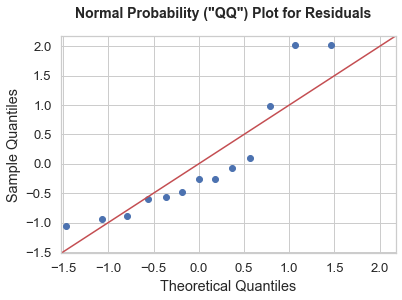

In [185]:
mult_regression(['Weight','SameDay','Difficulty'],'Absence', contextualData)
regressionmodel.summary()

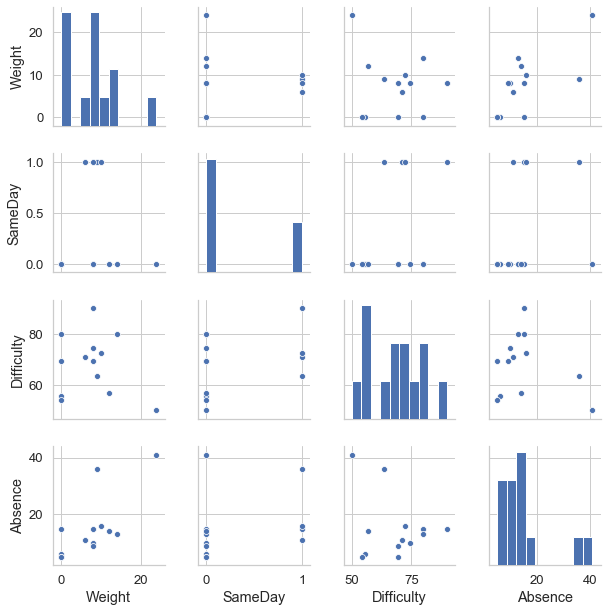

In [186]:
column_x = ['Weight','SameDay','Difficulty']
column_y = 'Absence'
columnstoplot = column_x + [column_y]

sns.pairplot(contextualData[columnstoplot], x_vars=columnstoplot, y_vars=columnstoplot, height=2.2);

# Even More Regression
How Notebook 'difficulty' correlates with average notebook scores

In [187]:
contextualData = pandas.read_csv("Assignment Dates - CSV Export.csv")
contextualData = contextualData.dropna()
contextualData.head(20)

,Weight,SameDay,Difficulty,Absence
0,0,0,55.714286,6.0
1,0,0,69.444444,5.0
2,6,1,71.000000,11.0
3,8,0,74.285714,10.0
4,9,1,63.571429,36.0
5,0,0,80.000000,15.0
6,0,0,54.166667,5.0
7,8,0,69.285714,9.0
8,8,1,90.000000,15.0
9,14,0,80.000000,13.0


In [188]:
totals = [10,15,6, 17,22,26,23,24,23,22,28,1,40,10]
averages = []
data = pandas.read_csv('F19 Coding SSS Attendance Tracker.csv')
data = data.fillna(0)
data.head()

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14
0,9.0,9.0,0.0,7,0.0,0.0,5.0,8.0,13.0,7.0,11.0,0.0,0.0,0.0
1,7.0,11.0,0.0,6,9.0,18.0,19.0,10.0,19.0,9.0,8.0,0.0,23.0,5.0
2,7.0,5.0,0.0,2,0.0,2.0,4.0,7.0,3.0,7.0,5.0,0.0,9.0,0.0
3,6.0,0.0,0.0,1,1.0,1.0,2.0,0.0,2.0,2.0,5.0,0.0,0.0,5.0
4,8.0,15.0,0.0,5,9.0,2.0,4.0,4.0,0.0,5.0,13.0,0.0,10.0,4.0


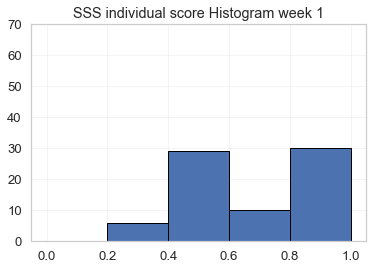

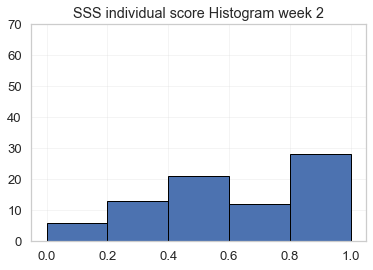

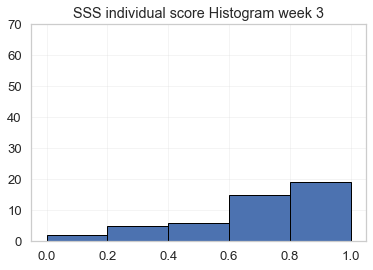

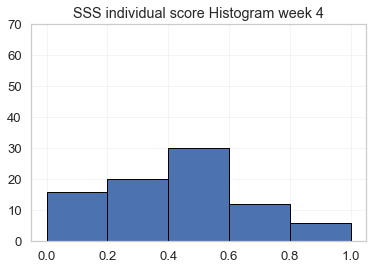

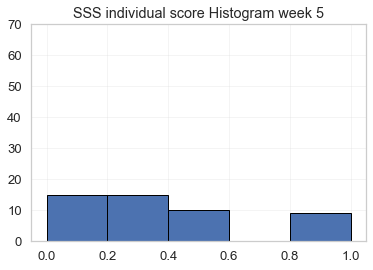

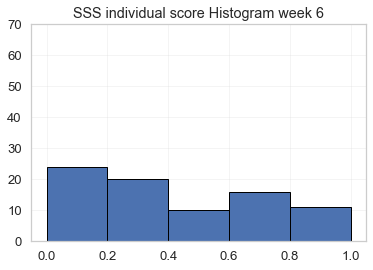

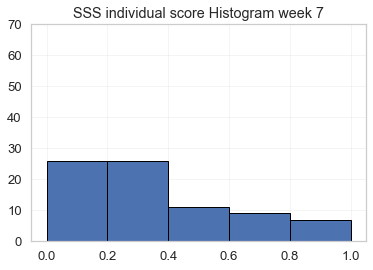

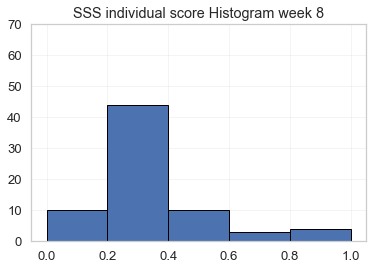

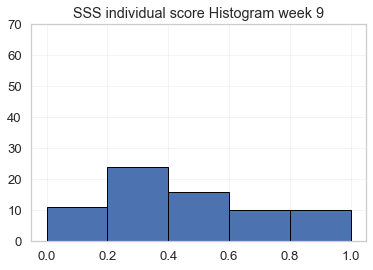

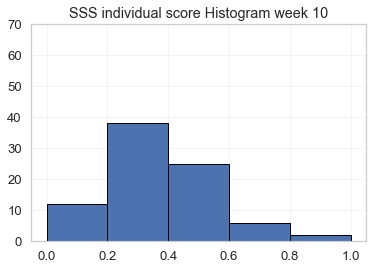

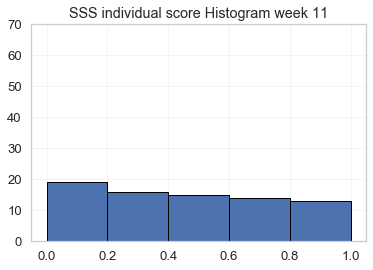

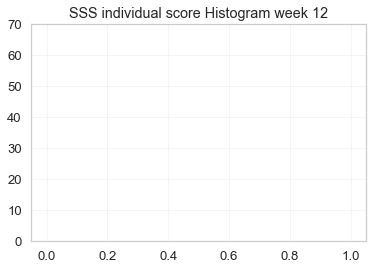

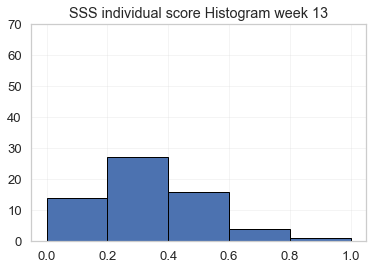

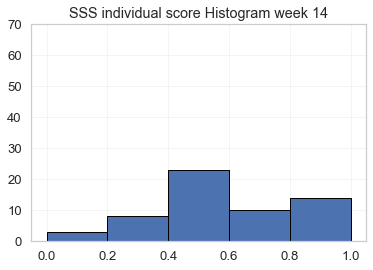

Done


In [230]:
'''
for i in range(0, 14):
    week_scores = []
    week_scores = list(data["Week " + str(i+1)].astype(float))
    for x in range(len(week_scores)):
        #if i == 12:
        #    print(week_scores[x], totals[i], '=',week_scores[x]/totals[i])
        week_scores[x] = week_scores[x]/totals[i]
    
    plt.hist(week_scores, ec='black', bins=5, range=[0,1])
    plt.ylim(top=70)
    plt.grid(alpha=.2)
    plt.title('Coding score Histogram week '+str(i+1))
    plt.savefig('Coding score Histogram week '+str(i+1), dpi=300, bbox_inches='tight')
    plt.show()
''' 

for i in range(0, 14):
    week_scores = []
    week_scores = list(data["Week " + str(i+1)].astype(float))
    for x in range(len(week_scores)):
        #if i == 12:
        #    print(week_scores[x], totals[i], '=',week_scores[x]/totals[i])
        week_scores[x] = week_scores[x]/totals[i]
    
    week_scores = list(filter(lambda a: a != 0, week_scores))
    
    plt.hist(week_scores, ec='black', bins=5, range=[0,1])
    plt.ylim(top=70)
    plt.grid(alpha=.2)
    plt.title('SSS individual score Histogram week '+str(i+1))
    plt.savefig('SSS individual score Histogram week '+str(i+1), dpi=300, bbox_inches='tight')
    #plt.show()
    
print('Done')

Calculating skew

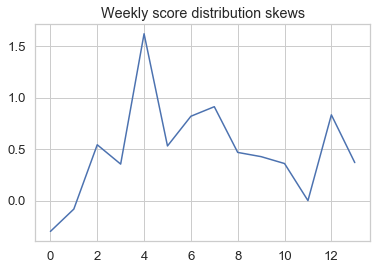

In [234]:
skews = []
for i in range(0, 14):
    skews.append((data["Week " + str(i+1)].astype(float)).skew())
    
plt.plot(skews)
plt.title("Weekly score distribution skews")
plt.show()

In [190]:
averages = []
for i in range(0, 14):
    week_scores = []
    week_scores = list(data["Week " + str(i+1)].astype(float))
    for x in range(len(week_scores)):
        week_scores[x] = week_scores[x]/totals[i]
    if i == 11:
        continue
    week_scores = list(filter(lambda a: a != 0, week_scores))
    averages.append(sum(week_scores)/len(week_scores))

In [191]:
len(averages)

13

In [192]:
contextualData['Averages'] = averages

In [193]:
contextualData.head(20)

,Weight,SameDay,Difficulty,Absence,Averages
0,0,0,55.714286,6.0,0.650667
1,0,0,69.444444,5.0,0.633333
2,6,1,71.000000,11.0,0.684397
3,8,0,74.285714,10.0,0.432773
4,9,1,63.571429,36.0,0.383581
5,0,0,80.000000,15.0,0.432099
6,0,0,54.166667,5.0,0.369290
7,8,0,69.285714,9.0,0.340376
8,8,1,90.000000,15.0,0.465524
9,14,0,80.000000,13.0,0.372809


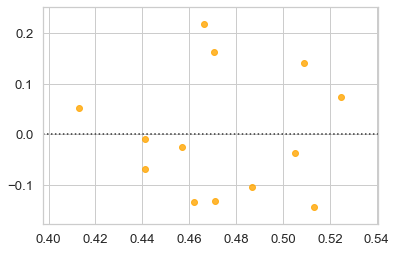

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Averages   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.8123
Date:                Sat, 28 Mar 2020   Prob (F-statistic):              0.387
Time:                        14:09:43   Log-Likelihood:                 9.5545
No. Observations:                  13   AIC:                            -15.11
Df Residuals:                      11   BIC:                            -13.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6648      0.215      3.097      0.010       0.192       1.137
Difficulty    -0.0014      0.002     -0.901      0.387      -0.005       0.002
Difficulty    -0.0014      0.002     -0.901      0.387      -0.005       0.002
==============================================================================
Omnibus:                        1.474   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.479   Jarque-Bera (JB):                1.039
Skew:                           0.447   Prob(JB):                        0.595
Kurtosis:                       1.942   Cond. No.                     3.86e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.34e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

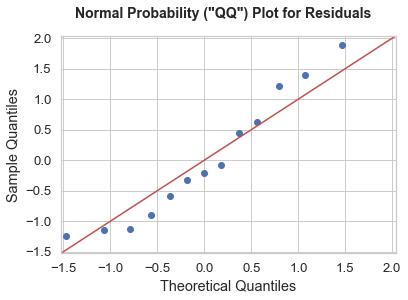

In [194]:
mult_regression(['Difficulty','Difficulty'],'Averages', contextualData)
regressionmodel.summary()

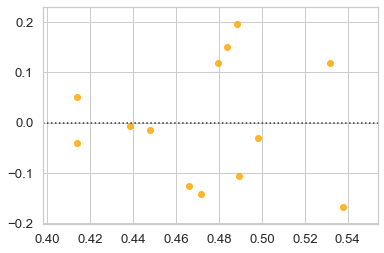

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Averages   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                 -0.358
Method:                 Least Squares   F-statistic:                    0.2084
Date:                Sat, 28 Mar 2020   Prob (F-statistic):              0.927
Time:                        14:09:44   Log-Likelihood:                 9.7358
No. Observations:                  13   AIC:                            -9.472
Df Residuals:                       8   BIC:                            -6.647
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7335      0.304      2.409      0.043       0.032       1.435
Weight        -0.0019      0.009     -0.205      0.843      -0.023       0.019
SameDay        0.0258      0.106      0.245      0.813      -0.218       0.269
Difficulty    -0.0035      0.004     -0.842      0.424      -0.013       0.006
Absence       -0.0008      0.006     -0.126      0.903      -0.015       0.014
==============================================================================
Omnibus:                        1.604   Durbin-Watson:                   1.260
Prob(Omnibus):                  0.449   Jarque-Bera (JB):                0.867
Skew:                           0.178   Prob(JB):                        0.648
Kurtosis:                       1.786   Cond. No.                         541.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

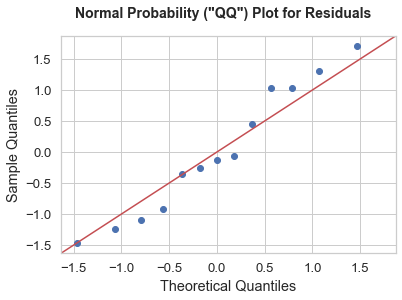

In [195]:
mult_regression(['Weight','SameDay','Difficulty','Absence'],'Averages', contextualData)
regressionmodel.summary()

# Overall  scores vs last assessment scores
====================================================================================================================




some space for easy navigation to this point





====================================================================================================================

In [415]:
'''
SSSFinalCombinedData = \
SSSFinalCombinedData.rename(columns={"Overall CS": "CS", "Overall EA": "EA", "Overall FA": "FA", "Overall MC": "MC",\
                  'Q22_Coding': 'Coding', 'Q22_Writing':'Writing'})
                  average, week 14, absences
                  '''

#noWeek14 = SSSFinalCombinedData['week 14'].astype(str) == "0.0"
#for i in range(len(SSSFinalCombinedData['week 14'])):
#    if noWeek14[i]:
#        SSSFinalCombinedData.loc[i,'week 14'] = np.nan
SSSFinalCombinedData = SSSFinalCombinedData.dropna()

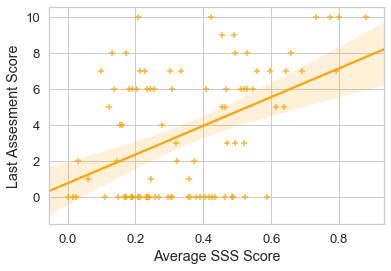

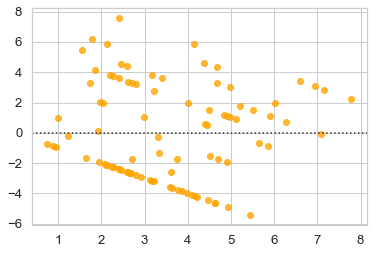

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                week 14   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     23.00
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           6.21e-06
Time:                        16:46:37   Log-Likelihood:                -239.82
No. Observations:                  94   AIC:                             483.6
Df Residuals:                      92   BIC:                             488.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7522      0.664      1.133      0.260      -0.566       2.070
average        7.9922      1.666      4.796      0.000       4.683      11.302
==============================================================================
Omnibus:                       12.088   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                4.981
Skew:                           0.301   Prob(JB):                       0.0829
Kurtosis:                       2.047   Cond. No.                         5.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

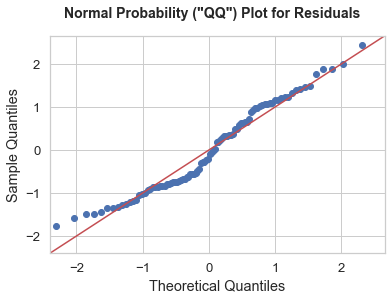

In [282]:
#SSSFinalCombinedData.describe()
#SSSFinalCombinedData.head()

mult_regression(['average'],'week 14', SSSFinalCombinedData, "Average SSS Score", "Last Assesment Score", "", "Reg average vs last PROPER")
regressionmodel.summary()

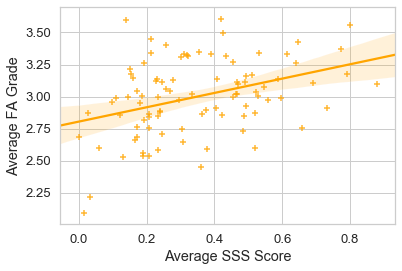

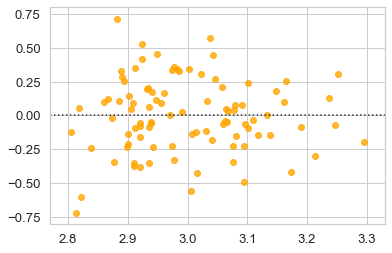

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     FA   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     14.92
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           0.000208
Time:                        16:58:35   Log-Likelihood:                -10.235
No. Observations:                  94   AIC:                             24.47
Df Residuals:                      92   BIC:                             29.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8043      0.058     48.592      0.000       2.690       2.919
average        0.5597      0.145      3.863      0.000       0.272       0.847
==============================================================================
Omnibus:                        0.068   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.025
Skew:                          -0.032   Prob(JB):                        0.987
Kurtosis:                       2.951   Cond. No.                         5.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

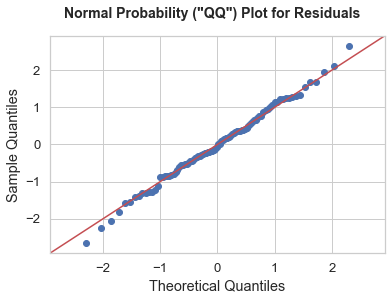

In [283]:
mult_regression(['average'],'FA', SSSFinalCombinedData, "Average SSS Score", "Average FA Grade", "", "Reg Average vs FA score")
regressionmodel.summary()

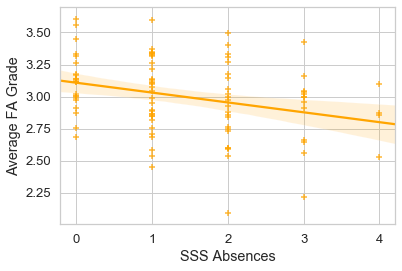

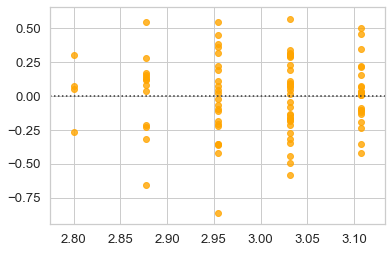

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     FA   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     8.757
Date:                Sat, 28 Mar 2020   Prob (F-statistic):            0.00392
Time:                        17:27:20   Log-Likelihood:                -13.026
No. Observations:                  94   AIC:                             30.05
Df Residuals:                      92   BIC:                             35.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1078      0.047     66.376      0.000       3.015       3.201
absences      -0.0769      0.026     -2.959      0.004      -0.129      -0.025
==============================================================================
Omnibus:                        1.743   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.418   Jarque-Bera (JB):                1.404
Skew:                          -0.298   Prob(JB):                        0.496
Kurtosis:                       3.063   Cond. No.                         3.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

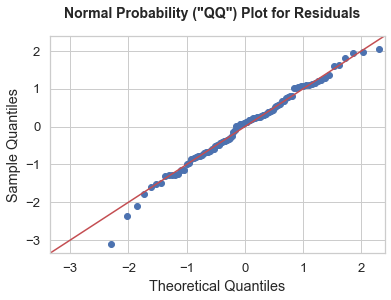

In [418]:
mult_regression(['absences'],'FA', SSSFinalCombinedData, "SSS Absences", "Average FA Grade", "", "Reg absences vs FA")
regressionmodel.summary()

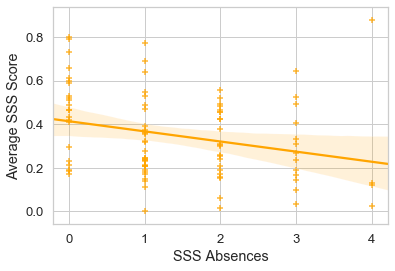

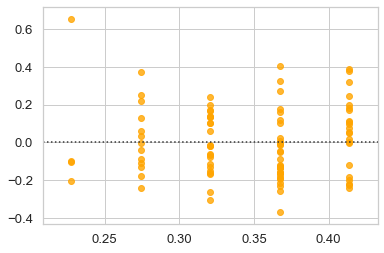

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                average   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     7.057
Date:                Sat, 28 Mar 2020   Prob (F-statistic):            0.00931
Time:                        17:00:36   Log-Likelihood:                 24.175
No. Observations:                  94   AIC:                            -44.35
Df Residuals:                      92   BIC:                            -39.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4136      0.032     13.121      0.000       0.351       0.476
absences      -0.0465      0.017     -2.657      0.009      -0.081      -0.012
==============================================================================
Omnibus:                        8.333   Durbin-Watson:                   0.185
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.037
Skew:                           0.692   Prob(JB):                       0.0180
Kurtosis:                       3.373   Cond. No.                         3.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

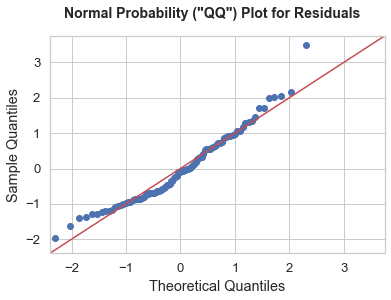

In [285]:
mult_regression(['absences'],'average', SSSFinalCombinedData, "SSS Absences", "Average SSS Score", "", "Reg Absences vs Average")
regressionmodel.summary()

# Lab completion vs scores

In [201]:
SSSFinalCombinedData = SSSFinalCombinedData.dropna()

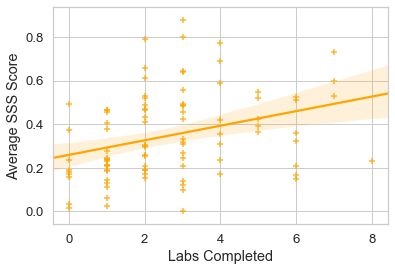

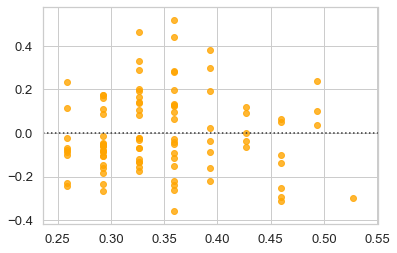

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                average   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     11.01
Date:                Sat, 28 Mar 2020   Prob (F-statistic):            0.00130
Time:                        17:24:05   Log-Likelihood:                 26.013
No. Observations:                  94   AIC:                            -48.03
Df Residuals:                      92   BIC:                            -42.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2591      0.033      7.879      0.000       0.194       0.324
Labs completed     0.0335      0.010      3.318      0.001       0.013       0.054
==============================================================================
Omnibus:                        4.550   Durbin-Watson:                   0.230
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                4.360
Skew:                           0.527   Prob(JB):                        0.113
Kurtosis:                       2.958   Cond. No.                         5.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

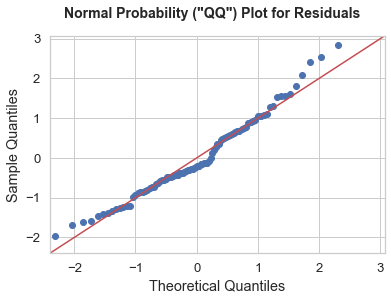

In [416]:
mult_regression(['Labs completed'],'average', SSSFinalCombinedData, "Labs Completed", "Average SSS Score", "", "Reg lab vs average")
regressionmodel.summary()

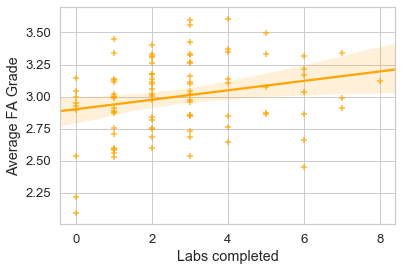

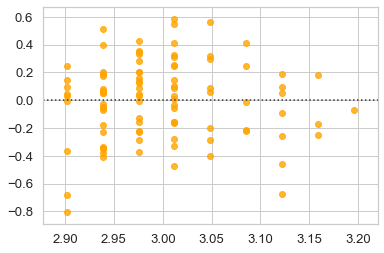

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     FA   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     5.602
Date:                Sat, 28 Mar 2020   Prob (F-statistic):             0.0200
Time:                        17:25:20   Log-Likelihood:                -14.521
No. Observations:                  94   AIC:                             33.04
Df Residuals:                      92   BIC:                             38.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.9015      0.051     57.333      0.000       2.801       3.002
Labs completed     0.0368      0.016      2.367      0.020       0.006       0.068
==============================================================================
Omnibus:                        1.608   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.447   Jarque-Bera (JB):                1.433
Skew:                          -0.301   Prob(JB):                        0.488
Kurtosis:                       2.945   Cond. No.                         5.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

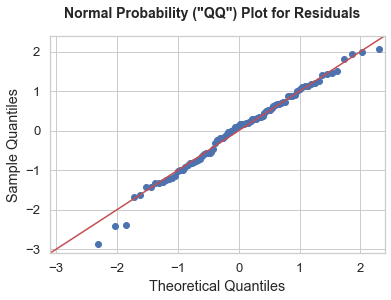

In [417]:
mult_regression(['Labs completed'],'FA', SSSFinalCombinedData, "Labs completed", "Average FA Grade", "", "Reg lab vs FA")
regressionmodel.summary()

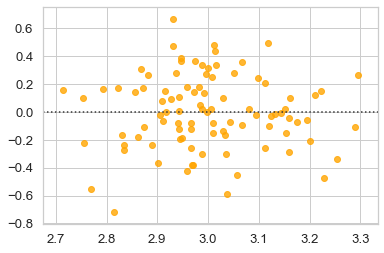

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     FA   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     10.03
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           0.000116
Time:                        14:10:09   Log-Likelihood:                -7.9370
No. Observations:                  94   AIC:                             21.87
Df Residuals:                      91   BIC:                             29.50
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9164      0.074     39.297      0.000       2.769       3.064
average        0.3796      0.118      3.226      0.002       0.146       0.613
absences      -0.0536      0.026     -2.078      0.041      -0.105      -0.002
==============================================================================
Omnibus:                        0.274   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.872   Jarque-Bera (JB):                0.308
Skew:                          -0.124   Prob(JB):                        0.857
Kurtosis:                       2.869   Cond. No.                         9.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

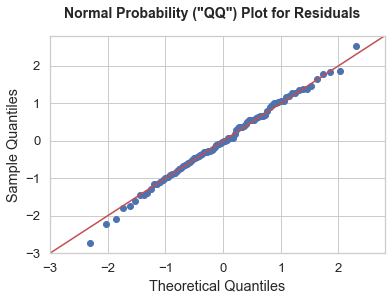

In [204]:
mult_regression(['average','absences'],'FA', SSSFinalCombinedData)
regressionmodel.summary()

# FA Score somparison of students who got 3-3.5 for Summer Assesment vs who got 4-4.5 (who barely failed vs who barely passed)

In [391]:
pandas.set_option('max_rows', 20)

fileName = "Processed [Fall 2019] SSS Final Combined Dataset.xlsx"
SSSFinalCombinedData = pandas.read_excel(fileName, sheet_name=1)
SSSFinalCombinedData.head(1)

,ID,AH50 Only - MC Mean,CS50 Only - FA Mean,Overall CS,Overall EA,Overall FA,Overall MC,Q22_Coding,Q26_Coding,Q15_Coding,Q25_Coding,Q17_Coding,Q19_Coding,Q21_Coding,Q53_1_Coding,Q53_2_Coding,Q55_Coding,Q22.1_Coding,Q27_Coding,Q33_Coding,Q34_Coding,Q35_Coding,Q22_Writing,Q26_Writing,Q15_Writing,Q25_Writing,Q17_Writing,Q19_Writing,Q21_Writing,Q53_1_Writing,Q53_2_Writing,Q55_Writing,Q22.1_Writing,Q27_Writing,Q33_Writing,Q34_Writing,Q35_Writing,SPS_Coding_2,SPS_Coding_3,SPS_Coding_4,SPS_Coding_5,SPS_Coding_6,SPS_Coding_7,SPS_Coding_8,SPS_Coding_9,SPS_Coding_10,SPS_Coding_11,SPS_Coding_12,SPS_Coding_13,SPS_Coding_14,SPS_Writing_2,SPS_Writing_3,SPS_Writing_4,SPS_Writing_5,SPS_Writing_6,SPS_Writing_7,SPS_Writing_8,SPS_Writing_9,SPS_Writing_10,SPS_Writing_11,SPS_Writing_12,SPS_Writing_13,SPS_Writing_14,Pre_Math_OverallPoints,Pre_Writing_OverallPoints,Pre_Programming_OverallPoints,Post_Programming_OverallPoints,Post_Math_OverallPoints,Post_Writing_OverallPoints,average-faulty,average,week 14,absences,Labs completed
0,ed810db6,3.067493,2.743173,3.062499,2.780515,2.685229,2.917084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Only some of it,3.0,NaN,I passed the preliminary assessment and didn't...,I did not sign up,1.0,-,I went through only part of the assignments/se...,4.0,NaN,"Yes, not frequently (less than once a week)",3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,9.0,Written Statement,No Submission,16,Passed before,0.0,0.0,0.0,1.0,3.0


In [392]:
# only pick the columns we need & Rename for easier coding
SSSFinalCombinedData = SSSFinalCombinedData[['Overall FA', 'Pre_Programming_OverallPoints', 'Post_Programming_OverallPoints', 'week 14']]
SSSFinalCombinedData = SSSFinalCombinedData.rename(columns={"Overall FA": "FA",\
                  'Pre_Programming_OverallPoints': 'pre_prog', 'Post_Programming_OverallPoints':'post_prog'})

SSSFinalCombinedData.head(10)

,FA,pre_prog,post_prog,week 14
0,2.685229,Written Statement,No Submission,0.0
1,2.093984,NaN,NaN,0.0
2,2.870685,NaN,0,0.0
3,2.218194,NaN,NaN,2.0
4,2.598805,Written Statement,No Submission,1.0
5,2.959410,Written Statement,2,7.0
6,2.987707,Written Statement,No Submission,0.0
7,2.853057,Written Statement,NaN,5.0
8,2.531868,Written Statement,No Submission,8.0
9,3.175789,NaN,NaN,4.0


In [393]:
SSSFinalCombinedData.insert(3,"combined_prog", None)

In [394]:
SSSFinalCombinedData.head(10)

,FA,pre_prog,post_prog,combined_prog,week 14
0,2.685229,Written Statement,No Submission,None,0.0
1,2.093984,NaN,NaN,None,0.0
2,2.870685,NaN,0,None,0.0
3,2.218194,NaN,NaN,None,2.0
4,2.598805,Written Statement,No Submission,None,1.0
5,2.959410,Written Statement,2,None,7.0
6,2.987707,Written Statement,No Submission,None,0.0
7,2.853057,Written Statement,NaN,None,5.0
8,2.531868,Written Statement,No Submission,None,8.0
9,3.175789,NaN,NaN,None,4.0


In [395]:
# Combine the pre and post programming data
'''
pre_prog >>> [number], NA, Written Statement
post_prog >> [number], NA, No Submission, Passed before

how to combine
[number] + [number] > take max
anything else + [number] > take num
'''
for i in range(len(SSSFinalCombinedData['FA'])):
    if type( SSSFinalCombinedData['pre_prog'][i]) is int:
        SSSFinalCombinedData.loc[i,'pre_prog'] = float(SSSFinalCombinedData['pre_prog'][i])
    if type( SSSFinalCombinedData['post_prog'][i]) is int:
        SSSFinalCombinedData.loc[i,'post_prog'] = float(SSSFinalCombinedData['post_prog'][i])
    
    
    if type( SSSFinalCombinedData['pre_prog'][i]) is float and type( SSSFinalCombinedData['post_prog'][i]) is float:
        SSSFinalCombinedData.loc[i,'combined_prog'] = max(SSSFinalCombinedData['pre_prog'][i],SSSFinalCombinedData['post_prog'][i])
    elif type( SSSFinalCombinedData['pre_prog'][i]) is float:
        SSSFinalCombinedData.loc[i,'combined_prog'] = SSSFinalCombinedData['pre_prog'][i]
    elif type( SSSFinalCombinedData['post_prog'][i]) is float:
        SSSFinalCombinedData.loc[i,'combined_prog'] = SSSFinalCombinedData['post_prog'][i]
    
    
SSSFinalCombinedData['combined_prog'] = SSSFinalCombinedData['combined_prog'].astype(float)

In [396]:
SSSFinalCombinedData.head(100)

,FA,pre_prog,post_prog,combined_prog,week 14
0,2.685229,Written Statement,No Submission,NaN,0.0
1,2.093984,NaN,NaN,NaN,0.0
2,2.870685,NaN,0,NaN,0.0
3,2.218194,NaN,NaN,NaN,2.0
4,2.598805,Written Statement,No Submission,NaN,1.0
5,2.959410,Written Statement,2,2.0,7.0
6,2.987707,Written Statement,No Submission,NaN,0.0
7,2.853057,Written Statement,NaN,NaN,5.0
8,2.531868,Written Statement,No Submission,NaN,8.0
9,3.175789,NaN,NaN,NaN,4.0


In [397]:
BarelyFailed = SSSFinalCombinedData[(SSSFinalCombinedData["combined_prog"] == 3.0) | (SSSFinalCombinedData["combined_prog"] == 3.5)]
BarelyFailed.head(2)

,FA,pre_prog,post_prog,combined_prog,week 14
10,2.764758,Written Statement,3,3.0,8.0
24,3.259594,Written Statement,3,3.0,0.0


In [398]:
BarelyPassed = SSSFinalCombinedData[(SSSFinalCombinedData["combined_prog"] == 4.0) | (SSSFinalCombinedData["combined_prog"] == 4.5)]
BarelyPassed.head(2)

,FA,pre_prog,post_prog,combined_prog,week 14
99,2.627809,Written Statement,4,4.0,NaN
100,3.168193,Written Statement,4,4.0,NaN


In [399]:
QuiteFailed = SSSFinalCombinedData[(SSSFinalCombinedData["combined_prog"] < 3.0)]
QuiteFailed.head(2)

,FA,pre_prog,post_prog,combined_prog,week 14
5,2.959410,Written Statement,2,2.0,7.0
11,2.992675,Written Statement,2.5,2.5,2.0


In [400]:
QuitePassed = SSSFinalCombinedData[(SSSFinalCombinedData["combined_prog"] > 4.5)]
QuitePassed.head(2)

,FA,pre_prog,post_prog,combined_prog,week 14
113,3.309573,1.5,5,5.0,NaN
114,2.893647,2.5,5,5.0,NaN


In [401]:
print('Barely Failed Mean FA', BarelyFailed['FA'].mean())
print('Barely Passed Mean FA', BarelyPassed['FA'].mean())
print('Quite Failed Mean FA', QuiteFailed['FA'].mean())
print('Quite Passed Mean FA', QuitePassed['FA'].mean())

Barely Failed Mean FA 3.122089808738796
Barely Passed Mean FA 3.186679366850353
Quite Failed Mean FA 3.1252164959392377
Quite Passed Mean FA 3.2802049813990917


In [402]:
passFail = SSSFinalCombinedData
passFail.insert(4,'passfail', None)

In [403]:
for i in range(len(passFail['combined_prog'])):
    if (passFail['combined_prog'][i] == 3.0) or (passFail['combined_prog'][i] == 3.5):
        SSSFinalCombinedData.loc[i,'passfail'] = float(0)
    elif (passFail['combined_prog'][i] == 4.0) or (passFail['combined_prog'][i] == 4.5):
        SSSFinalCombinedData.loc[i,'passfail'] = float(1)
    else:
        SSSFinalCombinedData.loc[i,'passfail'] = None
    
passFail = passFail.dropna(subset=['passfail'])

passFail.head(100)

,FA,pre_prog,post_prog,combined_prog,passfail,week 14
10,2.764758,Written Statement,3,3.0,0,8.0
24,3.259594,Written Statement,3,3.0,0,0.0
34,2.847595,Written Statement,3.5,3.5,0,0.0
41,3.401580,Written Statement,3.5,3.5,0,0.0
42,3.323045,3,3.5,3.5,0,3.0
58,2.951343,Written Statement,3.5,3.5,0,NaN
68,3.018627,Written Statement,3,3.0,0,6.0
88,3.328302,Written Statement,3,3.0,0,5.0
89,3.257933,Written Statement,3,3.0,0,5.0
94,2.912370,Written Statement,3,3.0,0,10.0


In [404]:
passFail['passfail'] = passFail['passfail'].astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [405]:
passFail['passfail']

10     0.0
24     0.0
34     0.0
41     0.0
42     0.0
58     0.0
68     0.0
88     0.0
89     0.0
94     0.0
      ... 
109    1.0
110    1.0
111    1.0
112    1.0
139    0.0
140    1.0
141    1.0
142    1.0
143    1.0
144    1.0
Name: passfail, Length: 31, dtype: float64

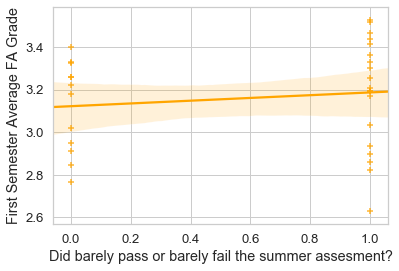

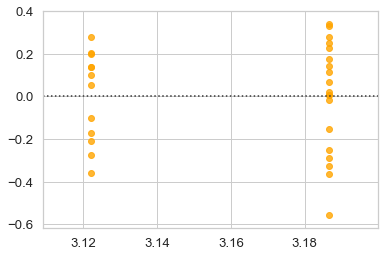

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     FA   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.5204
Date:                Sat, 28 Mar 2020   Prob (F-statistic):              0.476
Time:                        17:19:18   Log-Likelihood:                0.92426
No. Observations:                  31   AIC:                             2.151
Df Residuals:                      29   BIC:                             5.019
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1221      0.070     44.539      0.000       2.979       3.265
passfail       0.0646      0.090      0.721      0.476      -0.119       0.248
==============================================================================
Omnibus:                        2.423   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.298   Jarque-Bera (JB):                2.030
Skew:                          -0.506   Prob(JB):                        0.362
Kurtosis:                       2.259   Cond. No.                         2.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

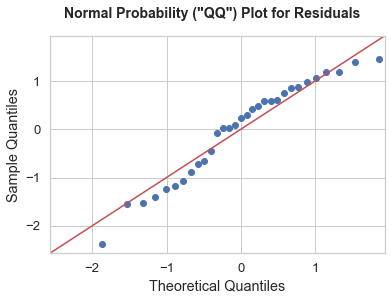

In [406]:
mult_regression(['passfail'],'FA', passFail, "Did barely pass or barely fail the summer assesment?", "First Semester Average FA Grade", '', "reg passfail vs FA")
regressionmodel.summary()

In [407]:
SSSFinalCombinedData = SSSFinalCombinedData.dropna(subset=['combined_prog'])

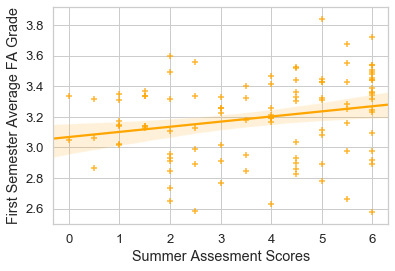

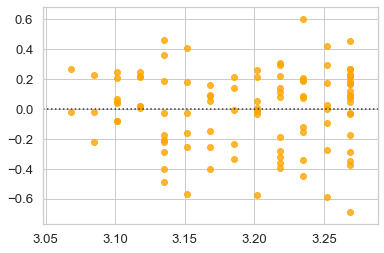

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     FA   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     5.660
Date:                Sat, 28 Mar 2020   Prob (F-statistic):             0.0192
Time:                        17:19:20   Log-Likelihood:                -6.3836
No. Observations:                 104   AIC:                             16.77
Df Residuals:                     102   BIC:                             22.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.0678      0.059     52.057      0.000       2.951       3.185
combined_prog     0.0335      0.014      2.379      0.019       0.006       0.061
==============================================================================
Omnibus:                        3.662   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.160   Jarque-Bera (JB):                3.664
Skew:                          -0.445   Prob(JB):                        0.160
Kurtosis:                       2.768   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

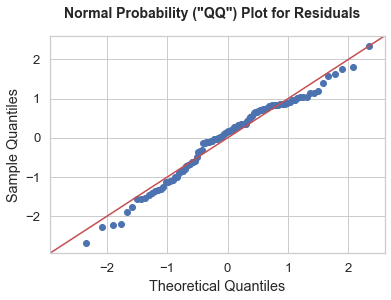

In [408]:
mult_regression(['combined_prog'],'FA', SSSFinalCombinedData, "Summer Assesment Scores", "First Semester Average FA Grade", "", "Reg Summer vs FA")
regressionmodel.summary()

In [409]:
SSSFinalCombinedData = SSSFinalCombinedData.dropna(subset=['week 14'])

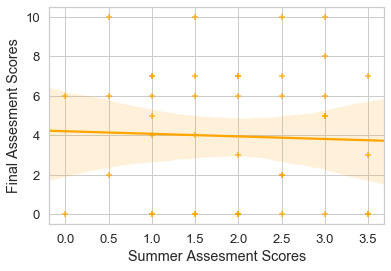

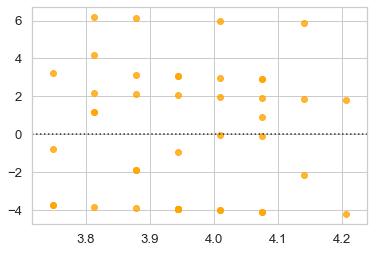

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                week 14   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                   0.05583
Date:                Sat, 28 Mar 2020   Prob (F-statistic):              0.814
Time:                        17:19:22   Log-Likelihood:                -116.22
No. Observations:                  44   AIC:                             236.4
Df Residuals:                      42   BIC:                             240.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.2056      1.184      3.551      0.001       1.815       6.596
combined_prog    -0.1307      0.553     -0.236      0.814      -1.247       0.986
==============================================================================
Omnibus:                       13.218   Durbin-Watson:                   1.470
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                3.158
Skew:                           0.153   Prob(JB):                        0.206
Kurtosis:                       1.724   Cond. No.                         5.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

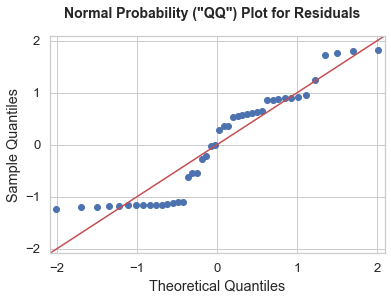

In [410]:
mult_regression(['combined_prog'],'week 14', SSSFinalCombinedData, "Summer Assesment Scores", "Final Assesment Scores", "", "Reg Summer vs week 14")
regressionmodel.summary()